# **A/B Testing Pada Kampanye Pemasaran**

**Introduction**

Perusahaan pemasaran ingin menjalankan kampanye yang sukses, tetapi pasar sangat kompleks dan dengan pilihan kampanye yang tepat dapat menghasilkan kampanye yang sukses. Oleh karena itu, biasanya mereka melakukan A/B testing.
Mayoritas orang akan terpapar iklan (kelompok eksperimen). Dan sebagian kecil orang (kelompok kontrol) akan melihat Pengumuman Layanan Publik (PSA) dengan ukuran dan tempat yang sama dengan iklan.

**Data**

Untuk data yang digunakan pada proyek kali ini menggunakan data Marketing A/B Testing yang bersumber dari Kaggle. Adapun informasi mengenai data tersebut adalah sebagai berikut:
* user id: User ID (unique).
* test group: Jika "ad", orang tersebut melihat iklan; jika "psa", mereka hanya melihat pengumuman layanan publik.
* converted: Jika seseorang membeli produk maka True, jika tidak maka False.
* total ads: Jumlah iklan yang dilihat oleh orang tersebut.
* most ads day: Hari di mana orang tersebut melihat jumlah iklan terbanyak.
* most ads hour: Jam pada hari di mana orang tersebut melihat jumlah iklan terbanyak.

**Sample Size**

Untuk menghitung ukuran sampel dalam merancang eksperimen kasus kampanye pemasaran, faktor-faktor berikut perlu diperhatikan:
* Significant level (α): menentukan tingkat signifikansi yang diterima dalam uji hipotesis. Secara umum dalam praktek uji hipotesis, α yang umum digunakan adalah 0.05 atau 5%.
* Power level (1 - β): probabilitas untuk menolak hipotesis nol ketika hipotesis alternatif benar. Secara umum, beta atau β diatur pada level 0.2 atau 20%, sehingga untuk power level 1-β  adalah 0.8 atau 80%.
* Standard deviation of population (σ): untuk kampanye pemasaran ini dan data yang digunakan, untuk standar deviasi populasi adalah 0.07 atau 7%.
* Difference between control and treatment (δ): berdasarkan keputusan perusahaan akan lebih menguntungkan jika tingkat konversi meningkat 1%.

Jumlah ukuran sampel dapat dihitung menggunakan formula berikut:

In [2]:
import scipy.stats as stats

# Nilai yang diberikan
alpha = 0.05
power_level = 0.8
standard_deviation = 0.07
delta = 0.01

# Menghitung beta
beta = 1 - power_level

# Menghitung z-value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

# Menghitung jumlah ukuran sampel
n = (2 * (z_alpha + z_beta)**2 * standard_deviation**2) / delta**2

# Cetak hasil
print("Jumlah ukuran sampel:", n)


Jumlah ukuran sampel: 769.1902139662106


**Running Experiment and Obtaining Data**

In [3]:
# konek google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# load library
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/A B Testing/marketing_AB.csv')
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
# Mengambil sampel pengguna secara acak
sample_size = 770

# Mengambil sampel untuk kelompok kontrol
control_group = data[data['test group'] == 'psa'].sample(sample_size, random_state=6)

# Mengambil sampel untuk kelompok treatment
treatment_group = data[data['test group'] == 'ad'].sample(sample_size, random_state=6)

# Menggabungkan kedua kelompok menjadi satu dataset eksperimen
experiment_data = pd.concat([control_group, treatment_group])
experiment_data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
26655,26655,919301,psa,False,135,Thursday,15
523984,523984,903875,psa,False,6,Friday,12
53833,53833,911151,psa,False,10,Monday,17
30723,30723,912946,psa,False,12,Wednesday,13
526230,526230,901572,psa,False,26,Friday,13


In [7]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 26655 to 586612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1540 non-null   int64 
 1   user id        1540 non-null   int64 
 2   test group     1540 non-null   object
 3   converted      1540 non-null   bool  
 4   total ads      1540 non-null   int64 
 5   most ads day   1540 non-null   object
 6   most ads hour  1540 non-null   int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 85.7+ KB


**Data Quality and Exploration**

In [8]:
# Cek kualitas data

# Memeriksa adanya missing values
print("\nMissing Values:")
print(experiment_data.isnull().sum())

# Memeriksa statistik deskriptif dari dataset
print("\nDescriptive Statistics:")
print(experiment_data.describe())

# Memeriksa jumlah unik dalam setiap kolom
print("\nUnique Values:")
for column in experiment_data.columns:
    unique_values = experiment_data[column].nunique()
    unique_column_values = experiment_data[column].unique()
    print(f"{column}: {unique_values}")
    print(f"Unique {column} values: {unique_column_values}")
    print()

# Memeriksa distribusi kategori dalam kolom 'test group'
print("\nDistribution of Test Group:")
print(experiment_data['test group'].value_counts())


Missing Values:
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

Descriptive Statistics:
          Unnamed: 0       user id    total ads  most ads hour
count    1540.000000  1.540000e+03  1540.000000    1540.000000
mean   302273.204545  1.123004e+06    23.764286      14.193506
std    190031.284349  2.493522e+05    40.669650       4.737991
min       376.000000  9.000620e+05     1.000000       0.000000
25%    122521.000000  9.118192e+05     4.000000      11.000000
50%    304761.000000  9.628230e+05    11.000000      14.000000
75%    491980.000000  1.345161e+06    26.000000      18.000000
max    587282.000000  1.654083e+06   563.000000      23.000000

Unique Values:
Unnamed: 0: 1540
Unique Unnamed: 0 values: [ 26655 523984  53833 ...  43096 505735 586612]

user id: 1540
Unique user id values: [ 919301  903875  911151 ... 1476428 1155799 1363968]

test group: 2
Unique test group values: ['psa


Total Ads Viewed by Most Ads Day:
most ads day
Monday       5234
Tuesday      4494
Wednesday    5261
Thursday     6360
Friday       5163
Saturday     5335
Sunday       4750
Name: total ads, dtype: int64


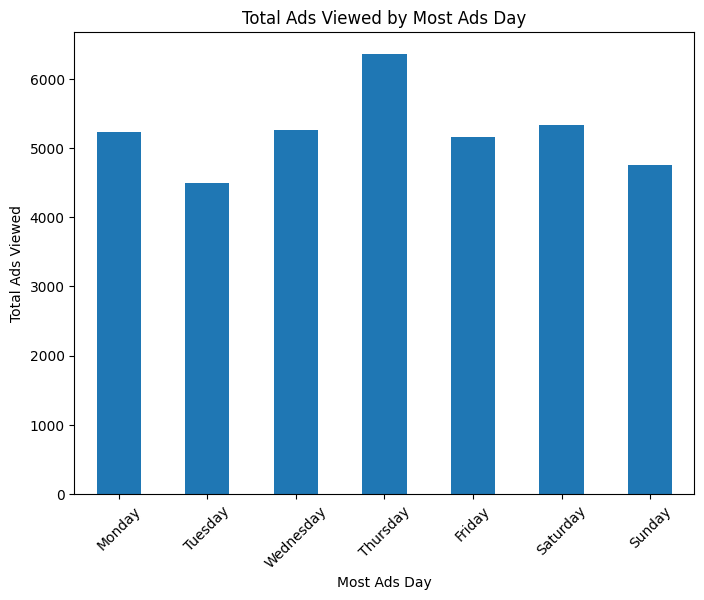


Total Ads Viewed by Most Ads Hour:
most ads hour
0      204
1      384
2      245
3      113
4      111
5       30
6      168
7      367
8     1190
9     1253
10    3229
11    2880
12    2633
13    3374
14    3298
15    3268
16    2651
17    2106
18    1976
19    1835
20    1711
21    1995
22    1014
23     562
Name: total ads, dtype: int64


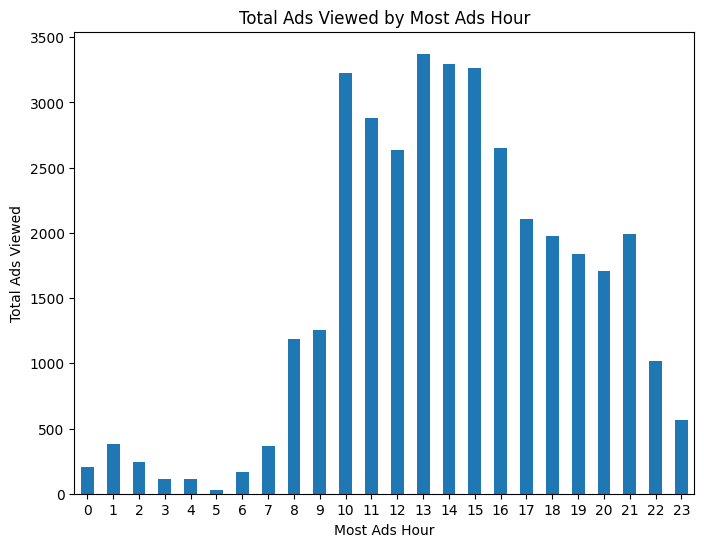

In [9]:
# Cek data eksplorasi

import matplotlib.pyplot as plt

# Membuat urutan hari
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Mengurutkan hari berdasarkan urutan yang ditentukan
experiment_data['most ads day'] = pd.Categorical(experiment_data['most ads day'], categories=days_of_week, ordered=True)

# Menampilkan total iklan yang dilihat berdasarkan hari terbanyak
print("\nTotal Ads Viewed by Most Ads Day:")
grouped_data = experiment_data.groupby('most ads day')['total ads'].sum()
print(grouped_data)

# Visualisasi total iklan yang dilihat berdasarkan hari terbanyak
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar')
plt.title('Total Ads Viewed by Most Ads Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Total Ads Viewed')
plt.xticks(rotation=45)
plt.show()

# Menampilkan total iklan yang dilihat berdasarkan jam terbanyak
print("\nTotal Ads Viewed by Most Ads Hour:")
grouped_data = experiment_data.groupby('most ads hour')['total ads'].sum()
print(grouped_data)

# Visualisasi total iklan yang dilihat berdasarkan jam terbanyak
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar')
plt.title('Total Ads Viewed by Most Ads Hour')
plt.xlabel('Most Ads Hour')
plt.ylabel('Total Ads Viewed')
plt.xticks(rotation=0)
plt.show()




Distribution of Converted:
False    1503
True       37
Name: converted, dtype: int64


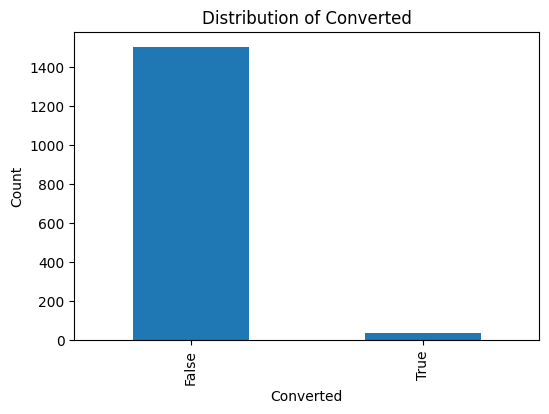

In [10]:
# Menampilkan distribusi kategori dalam kolom 'converted'
print("\nDistribution of Converted:")
converted_counts = experiment_data['converted'].value_counts()
print(converted_counts)

# Visualisasi distribusi kategori dalam kolom 'converted'
plt.figure(figsize=(6, 4))
converted_counts.plot(kind='bar')
plt.title('Distribution of Converted')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()


In [12]:
# Menghitung jumlah pengguna di kelompok kontrol
control_group_count = experiment_data[experiment_data['test group'] == 'psa'].shape[0]

# Menampilkan jumlah pengguna di kelompok kontrol
print("Jumlah pengguna di kelompok kontrol:", control_group_count)

# Menghitung jumlah pengguna di kelompok treatment
treatment_group_count = experiment_data[experiment_data['test group'] == 'ad'].shape[0]

# Menampilkan jumlah pengguna di kelompok treatment
print("Jumlah pengguna di kelompok treatment:", treatment_group_count)

# Menghitung total jumlah pengguna
total_users = control_group_count + treatment_group_count

# Menghitung persentase pengguna di kelompok control
control_group_percentage = round((control_group_count / total_users) * 100)

# Menghitung persentase pengguna di kelompok treatment
treatment_group_percentage = round((treatment_group_count / total_users) * 100)

# Menampilkan hasil persentase pengguna di kelompok control dan treatment
print("Persentase pengguna di kelompok control: {}%".format(control_group_percentage))
print("Persentase pengguna di kelompok treatment: {}%".format(treatment_group_percentage))


Jumlah pengguna di kelompok kontrol: 770
Jumlah pengguna di kelompok treatment: 770
Persentase pengguna di kelompok control: 50%
Persentase pengguna di kelompok treatment: 50%


In [13]:
# Menghitung total jumlah pengguna yang terlibat
total_show = control_group_count + treatment_group_count

# Menghitung nilai observed dan expected
observed = [control_group_count, treatment_group_count]
expected = [int(total_show / 2), int(total_show / 2)]

# Menampilkan hasil perhitungan
print(f"Total pengguna: {total_show}")
print(f"Observed: {observed}")
print(f"Expected: {expected}")

Total pengguna: 1540
Observed: [770, 770]
Expected: [770, 770]


**SRM Test with Chi-Square Test**

SRM merupakan masalah yang muncul ketika proporsi sampel antara kelompok kontrol dan kelompok treatment tidak seimbang. Hal ini dapat mempengaruhi validitas hasil uji statistik, terutama dalam A/B testing di mana kita ingin membandingkan dua kelompok untuk melihat efek dari variabel independen yang diubah.

In [18]:
# Import library yang diperlukan
from scipy.stats import chisquare
import scipy

# Menghitung chi-square statistics
chi = chisquare(observed, f_exp=expected)

# Menampilkan hasil perhitungan chi-square statistics
print(f"Chi-square statistics: {chi[0]:.3f}")
print(f"P-value: {chi[1]:.3f}")

# Menentukan alpha (tingkat signifikansi) dan derajat kebebasan (df)
alpha = 0.01
df = (2-1)*(2-1)

# Menghitung nilai kritis chi-square
chi_critical = scipy.stats.chi2.ppf(1 - alpha, df)
print(f"Critical value: {chi_critical:.3f}")

# Membuat keputusan berdasarkan chi-square statistics dan nilai kritis
if chi[0] > chi_critical:
    print("Tolak H0: Kemungkinan terdapat SRM.")
else:
    print("Tidak menolak H0: Tidak ada SRM.")

# Mengevaluasi hasil uji hipotesis
if chi[1] < alpha:
    print("Tolak H0: Kemungkinan terdapat SRM.")
else:
    print("Tidak menolak H0: Tidak ada SRM.")

Chi-square statistics: 0.000
P-value: 1.000
Critical value: 6.635
Tidak menolak H0: Tidak ada SRM.
Tidak menolak H0: Tidak ada SRM.


In [19]:
# Menghitung jumlah pengguna yang melakukan konversi dari kelompok kontrol
n_control_converted = len(experiment_data[(experiment_data['test group'] == 'psa') & (experiment_data['converted'] == True)])

# Menghitung jumlah pengguna yang melakukan konversi dari kelompok treatment
n_treatment_converted = len(experiment_data[(experiment_data['test group'] == 'ad') & (experiment_data['converted'] == True)])

print("Jumlah Pengguna yang Konversi:")
print(f"Kelompok Kontrol: {n_control_converted}")
print(f"Kelompok Treatment: {n_treatment_converted}")


Jumlah Pengguna yang Konversi:
Kelompok Kontrol: 12
Kelompok Treatment: 25


In [20]:
# Menghitung convert rate kelompok kontrol
control_convert_rate = n_control_converted / control_group_count

# Menghitung convert rate kelompok treatment
treatment_convert_rate = n_treatment_converted / treatment_group_count

print("Tingkat Konversi:")
print(f"Kelompok Kontrol: {control_convert_rate:.4f}")
print(f"Kelompok Treatment: {treatment_convert_rate:.4f}")



Tingkat Konversi:
Kelompok Kontrol: 0.0156
Kelompok Treatment: 0.0325


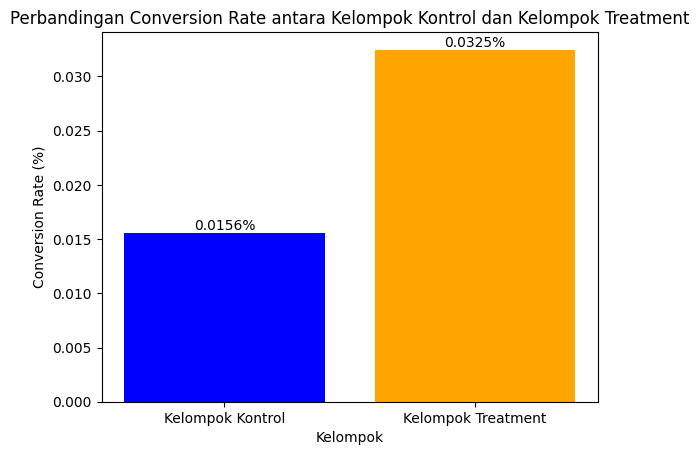

In [21]:
import matplotlib.pyplot as plt

# Data untuk visualisasi
groups = ['Kelompok Kontrol', 'Kelompok Treatment']
conversion_rates = [control_convert_rate, treatment_convert_rate]

# Warna untuk setiap batang
colors = ['blue', 'orange']

# Membuat plot batang
plt.bar(groups, conversion_rates, color=colors)

# Menambahkan nilai convert rate di atas batang
for i in range(len(groups)):
    plt.text(i, conversion_rates[i], f'{conversion_rates[i]:.4f}%', ha='center', va='bottom')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Kelompok')
plt.ylabel('Conversion Rate (%)')

# Menambahkan judul plot
plt.title('Perbandingan Conversion Rate antara Kelompok Kontrol dan Kelompok Treatment')

# Menampilkan plot
plt.show()




**Hypothesis Testing and Analyze The Result**

Dalam uji hipotesis ini, kita ingin menguji apakah kelompok treatment (ad) memiliki tingkat konversi yang lebih tinggi daripada kelompok control (psa). Misalnya, kita menetapkan p1 sebagai tingkat konversi treatment dan p2 sebagai tingkat konversi control.

Dengan demikian, kita dapat merumuskan hipotesis sebagai berikut:
* Hipotesis Nol (H0): Nilai konversi dalam kelompok treatment (ad) lebih rendah dari atau sama dengan nilai konversi dalam kelompok control (psa). Secara matematis, H0 : p1 <= p2.
* Hipotesis Alternatif (H1): Nilai konversi dalam kelompok treatment (ad) lebih tinggi dari nilai konversi dalam kelompok control (psa). Secara matematis, H1 : p1 > p2.

Selanjutnya, kita akan menetapkan tingkat signifikansi (alpha) pada nilai 0.05, yang merupakan ambang batas yang digunakan untuk mengambil keputusan statistik.

Dalam kasus ini, kita akan menggunakan statistik uji z-test for proportion untuk menghitung perbedaan proporsi antara dua grup. Dengan menggunakan metode ini, kita dapat mengevaluasi secara statistik apakah terdapat perbedaan yang signifikan antara tingkat konversi kelompok treatment dan control.

In [22]:
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

# Menghitung jumlah konversi dan total pengguna di kelompok treatment (ad)
n_treatment = treatment_group_count
converted_treatment = n_treatment_converted

# Menghitung jumlah konversi dan total pengguna di kelompok control (psa)
n_control = control_group_count
converted_control = n_control_converted

# Menentukan significance level (alpha)
alpha = 0.05

# Melakukan uji hipotesis menggunakan z-test for proportion
z_score, p_value = proportions_ztest([converted_treatment, converted_control], [n_treatment, n_control], alternative='larger')

# Menampilkan hasil uji hipotesis
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Mengevaluasi hasil uji hipotesis
if p_value < alpha:
    print("Menolak H0: Nilai konversi kelompok treatment lebih tinggi dari kelompok control.")
else:
    print("Menerima H0: Tidak ada perbedaan yang signifikan antara treatment dan control.")

# Menghitung z critical value
z_critical = stats.norm.ppf(1 - alpha)

# Mencetak nilai z critical value
print(f"Z Critical Value: {z_critical:.4f}")

# Mengevaluasi keputusan berdasarkan z-score dan z critical value
if z_score > z_critical:
    print("Menolak H0: Nilai konversi kelompok treatment lebih tinggi dari kelompok control.")
else:
    print("Menerima H0: Tidak ada perbedaan yang signifikan antara treatment dan control.")



Z-score: 2.1633
P-value: 0.0153
Menolak H0: Nilai konversi kelompok treatment lebih tinggi dari kelompok control.
Z Critical Value: 1.6449
Menolak H0: Nilai konversi kelompok treatment lebih tinggi dari kelompok control.


Selanjutnya, kita akan melakukan visualisasi hasil uji hipotesis pada grafik distribusi z-value. Grafik ini akan memperlihatkan perbandingan antara daerah z-value saat alpha = 0.05. Hasil visualisasi akan terlihat pada gambar berikut.

Z-score: 2.1633
P-value: 0.0153
Z Critical Value: 1.6449


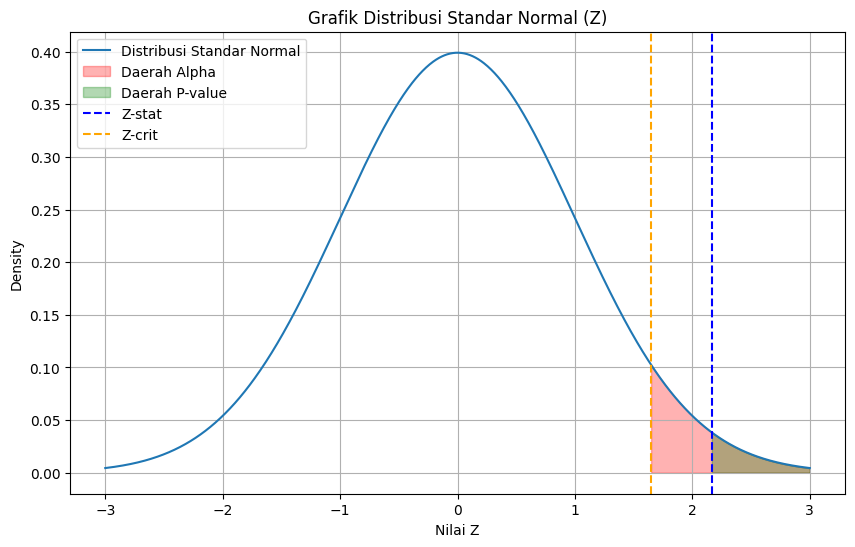

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Menentukan significance level (alpha)
alpha = 0.05

# Menghitung z critical value
z_critical = stats.norm.ppf(1 - alpha)

# Membuat distribusi standar normal (kurva z)
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Z Critical Value: {z_critical:.4f}")

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribusi Standar Normal')

# Menyoroti daerah alpha (critical region)
plt.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.3, label='Daerah Alpha')

# Menyoroti daerah p-value
if p_value < alpha:
    plt.fill_between(x, 0, y, where=(x >= z_score), color='green', alpha=0.3, label='Daerah P-value')

# Menandai nilai z-stat dan z-crit
plt.axvline(x=z_score, color='blue', linestyle='--', label='Z-stat')
plt.axvline(x=z_critical, color='orange', linestyle='--', label='Z-crit')

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.xlabel('Nilai Z')
plt.ylabel('Density')
plt.title('Grafik Distribusi Standar Normal (Z)')
plt.grid(True)
plt.show()


**Confidence Interval of Difference between Treatment and Control**

Selanjutnya kita menghitung dan menampilkan interval kepercayaan perbedaan proporsi antara kelompok treatment dan kelompok control. Interval kepercayaan ini memberikan perkiraan rentang nilai perbedaan proporsi yang mungkin ada antara kedua kelompok dengan tingkat kepercayaan tertentu.

In [24]:
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep

# Menghitung confidence interval (interval kepercayaan) perbedaan proporsi antara dua kelompok
conf_interval = confint_proportions_2indep(n_treatment_converted, treatment_group_count,
                                           n_control_converted, control_group_count)

# Mendapatkan lower bound dan upper bound dari confidence interval
lower_bound = conf_interval[0]
upper_bound = conf_interval[1]

# Menampilkan hasil
print(f"Confidence Interval: [{lower_bound}, {upper_bound}]")

Confidence Interval: [0.0014230345786209048, 0.033310497741771944]


**Conclusion from The Previous Analysis**

Kesimpulan yang didapatkan dari hasil analisis di atas adalah sebagai berikut:
* Berdasarkan uji hipotesis, terdapat bukti yang cukup untuk menolak hipotesis nol (H0) yang menyatakan bahwa nilai konversi dalam kelompok treatment (ad) lebih rendah dari atau sama dengan nilai konversi dalam kelompok control (psa). Dengan kata lain, kelompok treatment (ad) memiliki tingkat konversi yang lebih tinggi daripada kelompok control (psa).
* Dalam konteks ini, hasil Confidence Interval menunjukkan bahwa terdapat perbedaan yang signifikan antara kelompok treatment (ad) dan kelompok control (psa) dalam hal tingkat konversi. Rentang Confidence Interval yang tidak mencakup nilai 0 menunjukkan bahwa kelompok treatment memiliki tingkat konversi yang lebih tinggi secara signifikan daripada kelompok control.

**Recomendation for The Business**

Berdasarkan hasil analisis di atas, rekomendasi bisnis untuk perusahaan adalah sebagai berikut:
* Berdasarkan hasil uji hipotesis, terdapat bukti statistik (statistically significant) yang menunjukkan bahwa kelompok treatment (ad) memiliki tingkat konversi yang lebih tinggi daripada kelompok control (psa).
* Meskipun bukti statistik menunjukkan adanya perbedaan yang signifikan, disarankan untuk untuk memantau metrik-metrik yang relevan, seperti tingkat konversi dan ROI (Return on Investment), sehingga perusahaan dapat memperoleh wawasan yang lebih dalam mengenai efektivitas strategi pemasaran yang diimplementasikan.
* Melalui perubahan yang dilakukan pada kelompok treatment, terbukti terdapat peningkatan yang signifikan dalam jumlah pengguna yang melakukan konversi. Hal ini menunjukkan bahwa strategi pemasaran yang melibatkan kelompok treatment lebih efektif dalam menghasilkan hasil yang diinginkan. Berdasarkan pertimbangan di atas, perubahan tersebut dianggap secara praktis signifikan (practically sigificant).

**Recomendation for The Next Exeperiment**

Saran untuk eksperimen selanjutnya:
* Melakukan eksperimen yang lebih lanjut untuk mengidentifikasi faktor-faktor yang berkontribusi pada peningkatan konversi di kelompok treatment.
* Melakukan pengujian lebih lanjut dengan sample yang lebih besar untuk memperoleh hasil yang lebih valid dan dapat diandalkan.
* Memperhatikan faktor-faktor lain seperti segmentasi pengguna, targeting iklan, atau jenis kampanye yang dapat mempengaruhi tingkat konversi, sehingga dapat mengoptimalkan strategi pemasaran perusahaan.